In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

import statsmodels.formula.api as smf
from scipy import stats

from DrawingTool import DrawingTool
from FileHandler import FileHandler
from DataHandler import DataHandler

In [40]:
data = pd.read_excel('Folds5x2_pp.xlsx')
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

# 1. Scatter plot among variables and response

## Description

Scatter plot matrix is used to demonstrate relations between each paire of variables.

---

## Analysis

* The label PE is significantly associated with variables AT and V than it is with AP and RH. This means that the p-value for coeficients of AT and V probably is significantly small after the linear regression is build (The conclusion need be proven in later experiment).
* V has a clearly positive relation with AT while AT has a relatively obscure relation with AP and RH.


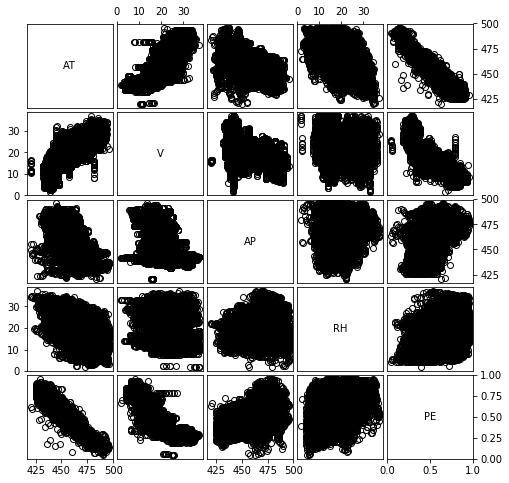

In [25]:
%matplotlib inline

drawingTool = DrawingTool()
colums_name = data.columns.values.tolist()

fig = drawingTool.scatterplot_matrix(data.values.T, colums_name, linestyle='none', marker='o', color='black', mfc='none')
plt.show()

# 2. Various statistics for variables

## Description

The mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset will be computed and analyzed.

---

## Analysis

* With the assistance of box plots, we can discover the outliers with ease.

In [42]:
var_mean = np.mean(data.values, axis=0)
var_median = np.median(data.values, axis=0)
var_range = np.max(data.values, axis=0) - np.min(data.values, axis=0)
var_first_quartile = np.percentile(data, 25, axis=0)
var_third_quartile = np.percentile(data, 75, axis=0)
var_IQR = var_third_quartile - var_first_quartile

data_statistics = pd.DataFrame([var_mean, var_mean, var_range, var_first_quartile, var_third_quartile, var_IQR]
                               , columns=data.columns.values
                               , index=['mean', 'median', 'range', '1/4 quartile', '3/4 quartile', 'IQR'])

print(data_statistics)

                     AT          V           AP         RH          PE
mean          19.651231  54.305804  1013.259078  73.308978  454.365009
median        19.651231  54.305804  1013.259078  73.308978  454.365009
range         35.300000  56.200000    40.410000  74.600000   75.500000
1/4 quartile  13.510000  41.740000  1009.100000  63.327500  439.750000
3/4 quartile  25.720000  66.540000  1017.260000  84.830000  468.430000
IQR           12.210000  24.800000     8.160000  21.502500   28.680000


# 3. Simple Linear Regression

## Description

For each predictor, fit a simple linear regression model to predict the response.

---

## Analysis

* The model describing the relations between variables, AT and V, and response displays significant association. 


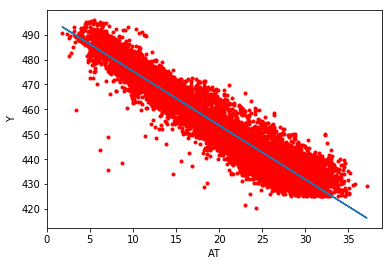

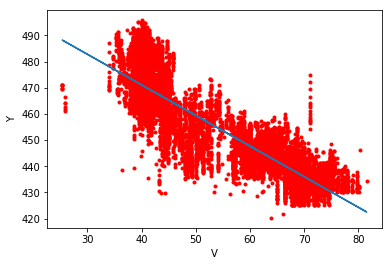

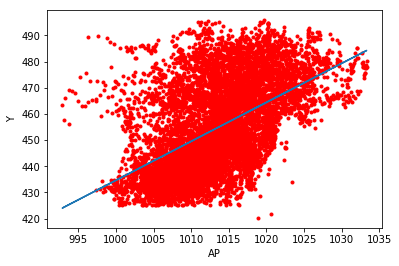

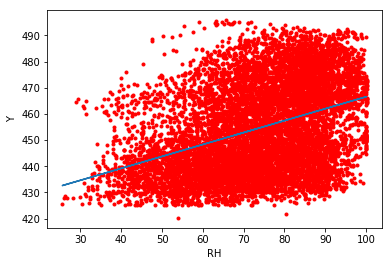

In [13]:
training_data, training_label = data.values[:, :-1], data.values[:, -1]

simple_lr_coefs = np.array([])

for i in range(training_data.shape[1]):
    lr = LinearRegression()
    train_data_univariate = np.reshape(training_data[:, i], (-1, 1))

    lr.fit(train_data_univariate, training_label)
    predicted_label = lr.predict(train_data_univariate)
    
    simple_lr_coefs = np.append(simple_lr_coefs, lr.coef_)
    
    plt.figure()
    plt.plot(training_data[:, i], training_label, 'r.')
    plt.plot(training_data[:, i], predicted_label)
    
    plt.xlabel(data.columns.values[i])
    plt.ylabel('Y')
    plt.show()
    

# 4. Multivariated Linear Regression

## Description

Fit a mutiple linear regression model with all of variables to predict the response.

---

## Analysis

* According to F-statistic value and T-statist value, there is the powerful evidence against null hypothesis.


In [11]:
training_data, training_label = data.values[:, :-1], data.values[:, -1]
# lr = LinearRegression()
# lr.fit(training_data, training_label)

# predicted_label = lr.predict(training_data)

# slope, intercept, r_value, p_value, std_err = stats.linregress(training_data, training_label)

# print(slope, intercept, r_value, p_value, std_err)
print(smf.OLS(training_label, training_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.939e+07
Date:                Sat, 02 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:51:43   Log-Likelihood:                -29068.
No. Observations:                9568   AIC:                         5.814e+04
Df Residuals:                    9564   BIC:                         5.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6781      0.015   -109.169      0.0

# 5. Comparison between different Linear Regression models

## Description

Compare the coefficients in univariated linear regression model with those in multivariated linear regression model.

---

## Analysis


In [17]:
print("coefficients in simple linear regression model: \n", simple_lr_coefs)

training_data, training_label = data.values[:, :-1], data.values[:, -1]
lr = LinearRegression()
lr.fit(training_data, training_label)
print("coefficients in multiple linear regression model: \n", lr.coef_)


coefficients in simple linear regression model: 
 [-2.17131996 -1.16813513  1.48987167  0.4556501 ]
coefficients in multiple linear regression model: 
 [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


# 6. nonlinear association

## Description

To find out the non-linear association between any of predictors and the response, we add the square of predictors and the cube of predictors to the linear regression model.

---

## Analysis


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.469e+05
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:17:04   Log-Likelihood:                -48448.
No. Observations:                9568   AIC:                         9.690e+04
Df Residuals:                    9565   BIC:                         9.692e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            87.3234      0.219    399.593      0.0

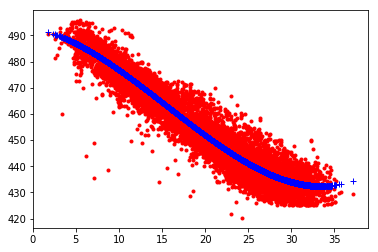

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.268e+06
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:17:04   Log-Likelihood:                -35138.
No. Observations:                9568   AIC:                         7.028e+04
Df Residuals:                    9565   BIC:                         7.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            28.5727      0.047    607.797      0.0

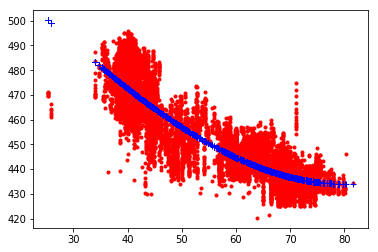

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:17:04   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            25.2558      3.001      8.415      0.0

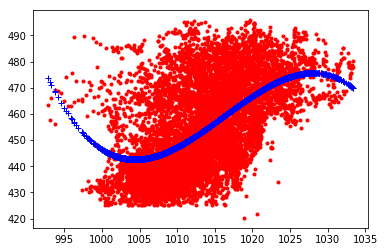

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.214e+06
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:17:04   Log-Likelihood:                -40820.
No. Observations:                9568   AIC:                         8.165e+04
Df Residuals:                    9565   BIC:                         8.167e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            19.7151      0.063    311.441      0.0

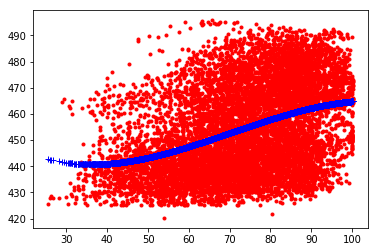

In [21]:
# X = np.arange(6).reshape(3, 2)
# print(X)

# polynomial = PolynomialFeatures()
# print(polynomial.fit_transform(X))

# X1 = X**2
# print(X1)
# X2 = np.c_[X, X1]
# print(X2)
training_label = data.values[:, -1]

for i in range(data.values.shape[1]-1):
    training_data = np.reshape(data.values[:, i], (-1, 1))
    training_data = np.c_[training_data, training_data**2, training_data**3]
    
    lr = LinearRegression()
    lr.fit(training_data, training_label)
    
    predicted_label = lr.predict(training_data)
    
    print(smf.OLS(training_label, training_data).fit().summary())
    
    plt.figure()
    plt.plot(data.values[:, i], training_label, 'r.')
    plt.plot(data.values[:, i], predicted_label, 'b+')
    
    plt.show()
    
    

# 7. interaction among variables

## Description

To find out interactions among variabels, we add the interaction items to the linear regression model.

---

## Analysis

Based on analysis table, x1*x4 and x2*x4 is not significant.


In [27]:
training_data, training_label = data.values[:, :-1], data.values[:, -1]

def test_interactions(training_data, training_label):
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)

    #training data [x1, x2, x3，x4, x1*x2, x1*x3, x1*x4, x2*x3, x2*x4, x3*x4]
    training_data = poly.fit_transform(training_data)
#     print(training_data.shape)
    
    print(smf.OLS(training_label, training_data).fit().summary())
    
    
test_interactions(training_data, training_label)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.057e+07
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:28:32   Log-Likelihood:                -27586.
No. Observations:                9568   AIC:                         5.519e+04
Df Residuals:                    9558   BIC:                         5.526e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6622      2.312      0.286      0.7

# 8. Train model with appropriate interaction terms and quadratic nonlinearities

## Description

Train model both with exclusively provided variables and with additional interactions terms and quadratic terms. Compare the MSEs generated by two models.

---

## Analysis

In [52]:
data_, label_ = data.values[:, :-1], data.values[:, -1]

def base_linear_model(data, label):
    training_data, test_data, training_label, test_label = train_test_split(data, label, test_size=0.3, random_state=1, shuffle=False)
#     print(training_data, test_data, training_label, test_label)

    lr = LinearRegression()
    lr.fit(training_data, training_label)
    predicted_label = lr.predict(test_data)
    mse = mean_squared_error(test_label, predicted_label)
    print('model 1: ', mse)
    
def poly_linear_model(data, label):
    poly = PolynomialFeatures(include_bias=False)
    data = poly.fit_transform(data)
#   [x1, x2, x3, x4, x5=x1*x1, x6=x1*x2, x7=x1*x3, x8=x1*x4, x9=x2*x2, x10=x2*x3, x11=x2*x4, 
#   x12=x3*x3, x13=x3*x4, x14=x4*x4]
    
    training_data, test_data, training_label, test_label = train_test_split(data, label, test_size=0.3, random_state=1, shuffle=False)
    lr = LinearRegression()
    lr.fit(training_data, training_label)
    predicted_label = lr.predict(test_data)
    mse = mean_squared_error(test_label, predicted_label)
    print('model 2: ', mse)    
    
    print(smf.OLS(training_label, training_data).fit().summary())

base_linear_model(data_, label_)
poly_linear_model(data_, label_)

model 1:  22.2107452083
model 2:  19.3452642414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.588e+06
Date:                Sun, 03 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:09:26   Log-Likelihood:                -19118.
No. Observations:                6697   AIC:                         3.826e+04
Df Residuals:                    6683   BIC:                         3.836e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1  

In [61]:
def enhanced_linear_model(data, label):
    poly = PolynomialFeatures(include_bias=False)
    data = poly.fit_transform(data)
#   [x1, x2, x3, x4, x5=x1*x1, x6=x1*x2, x7=x1*x3, x8=x1*x4, x9=x2*x2, x10=x2*x3, x11=x2*x4, 
#   x12=x3*x3, x13=x3*x4, x14=x4*x4]
    data = np.delete(data, [8, 9, 10], axis=1)
    
    training_data, test_data, training_label, test_label = train_test_split(data, label, test_size=0.3, random_state=1, shuffle=False)
    lr = LinearRegression()
    lr.fit(training_data, training_label)
    predicted_label = lr.predict(test_data)
    mse = mean_squared_error(test_label, predicted_label)
    print('model 3: ', mse)    
    
#     print(smf.OLS(training_label, training_data).fit().summary())

enhanced_linear_model(data_, label_)

model 3:  19.3253002226


# 9. Comparison between knn and linear regression

## Description

Perform respectively knn and linear regression on training data and compare the MSE generated by two models.

---

## Analysis



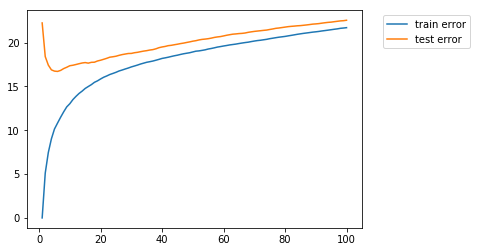

optimal test error 16.71386488834707, k = 6


In [68]:

def knn_model(data, label):
    training_data, test_data, training_label, test_label = train_test_split(data, label, test_size=0.3, random_state=1, shuffle=False)    
    
    train_error = np.array([])
    test_error = np.array([])
    
    ks = range(1, 101)
    for k in ks:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(training_data, training_label)
        
        train_error = np.append(train_error, mean_squared_error(training_label, knn.predict(training_data)))
        test_error = np.append(test_error, mean_squared_error(test_label, knn.predict(test_data)))
    
    plt.figure()
    plt.plot(ks, train_error, label='train error')
    plt.plot(ks, test_error, label='test error')
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
    
    plt.show()
    
    print('optimal test error {0}, k = {1}'.format(np.min(test_error), ks[np.argmin(test_error)]))
    
knn_model(data_, label_)
    